# SURROGATE MODELS POSTPROCESSING NOTEBOOK

This python notebook is used to generate effective plots for the results obtained on an X-capacitive accelerometer, accounting for unknown overecth, offset and thickness.

We will start by training the surrogate modelling, plotting the predictions, and then we will start the identiifcation procedure.

##### Importing Necessary Libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../../src/SurrogateModeling')
sys.path.append('../../src/utils/')

from model import NN_Model
from training import train
from preprocessing import preprocessing
from postprocessing import *

## First Surrogate Model training

We start training the surrogate model, in order to do so we use the corresponding configuration file. In addition we set some values in order to hide confidential information in the plots.

In [2]:
# CONFIGURATION FILE
CONFIGURATION_FILE = './config_I.json'

mean_overetch, mean_offset, mean_thickness = 0.0, 0.0, 0.0
sigma_O, sigma_U, sigma_T = 1.0, 1.0, 1.0

We start importing the dataset, through the preprocessing utility. Then we plot the data, subdivided in validation and training sets

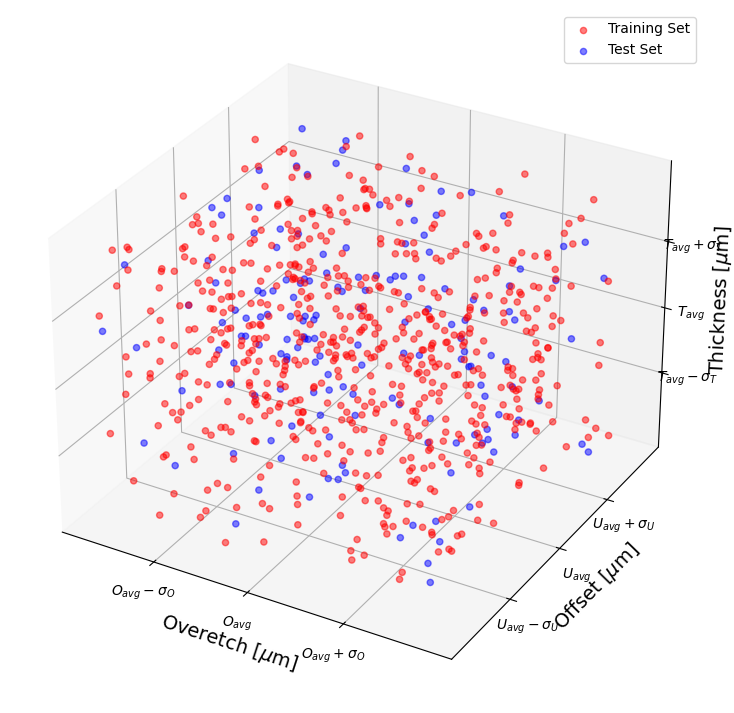

In [3]:
# Preprocessing
data_processor = preprocessing(CONFIGURATION_FILE)

# Collecting traing and Testing Data
X_train = data_processor.X_train
X_test = data_processor.X_test
y_train = data_processor.y_train
y_test = data_processor.y_test

# Time steps of the simulations
time = data_processor.time

# Scaled and processed data
X_train_vec = data_processor.X_train_vec
X_test_vec = data_processor.X_test_vec 

labels = [
    r'Overetch [${\mu}$m]', 
    r'Offset [${\mu}$m]', 
    r'Thickness [${\mu}$m]'
    ]

ticks = [
    [mean_overetch - sigma_O + 0.05, mean_overetch, mean_overetch + sigma_O - 0.05],
    [mean_offset - sigma_U + 0.05, mean_offset, mean_offset + sigma_U - 0.05],
    [mean_thickness - sigma_T + 0.1, mean_thickness, mean_thickness + sigma_T-0.1]
]

ticks_labels = [
    [r'$O_{avg}-\sigma_O$', r'$O_{avg}$', r'$O_{avg}+\sigma_O$'],
    [r'$U_{avg}-\sigma_U$', r'$U_{avg}$', r'$U_{avg}+\sigma_U$'],
    [r'$T_{avg}-\sigma_T$', r'$T_{avg}$', r'$T_{avg}+\sigma_T$']
]


plot_dataset(X_train, X_test, features_labels=labels, features_ticks=ticks, features_ticks_labels=ticks_labels, digits='%.2f', projection='3d')


### Surrogate Model Training

Then, we train the model. If you want you can use a pretrained model, just changing the flag.

In [4]:
training = True

if training:
    train(CONFIGURATION_FILE)

model_I = NN_Model()
model_I.load_model(data_processor.config['MODEL_PATH'])

Num GPUs Available:  0
Epoch 1/1000


/Users/filippozacchei/anaconda3/envs/cuqipy/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 - 1s - 25ms/step - loss: 0.0148 - mse: 0.0148 - learning_rate: 0.0010
Epoch 2/1000
40/40 - 0s - 4ms/step - loss: 8.7645e-04 - mse: 8.7612e-04 - learning_rate: 9.9010e-04
Epoch 3/1000
40/40 - 0s - 5ms/step - loss: 6.1762e-04 - mse: 6.1729e-04 - learning_rate: 9.8039e-04
Epoch 4/1000
40/40 - 0s - 4ms/step - loss: 5.2091e-04 - mse: 5.2058e-04 - learning_rate: 9.7087e-04
Epoch 5/1000
40/40 - 0s - 4ms/step - loss: 4.4849e-04 - mse: 4.4815e-04 - learning_rate: 9.6154e-04
Epoch 6/1000
40/40 - 0s - 4ms/step - loss: 3.8495e-04 - mse: 3.8462e-04 - learning_rate: 9.5238e-04
Epoch 7/1000
40/40 - 0s - 4ms/step - loss: 3.4126e-04 - mse: 3.4092e-04 - learning_rate: 9.4340e-04
Epoch 8/1000
40/40 - 0s - 4ms/step - loss: 3.0505e-04 - mse: 3.0472e-04 - learning_rate: 9.3458e-04
Epoch 9/1000
40/40 - 0s - 4ms/step - loss: 2.7388e-04 - mse: 2.7355e-04 - learning_rate: 9.2593e-04
Epoch 10/1000
40/40 - 0s - 7ms/step - loss: 2.5719e-04 - mse: 2.5686e-04 - val_loss: 3.1926e-04 - val_mse: 3.1893e-04 - lear

### Accuracy

We now plot the predictions of the surrogate model with respect to real validation data.

If the predictions are not accurate enough, enrich model, improve training parameter or increase the number of training epochs.

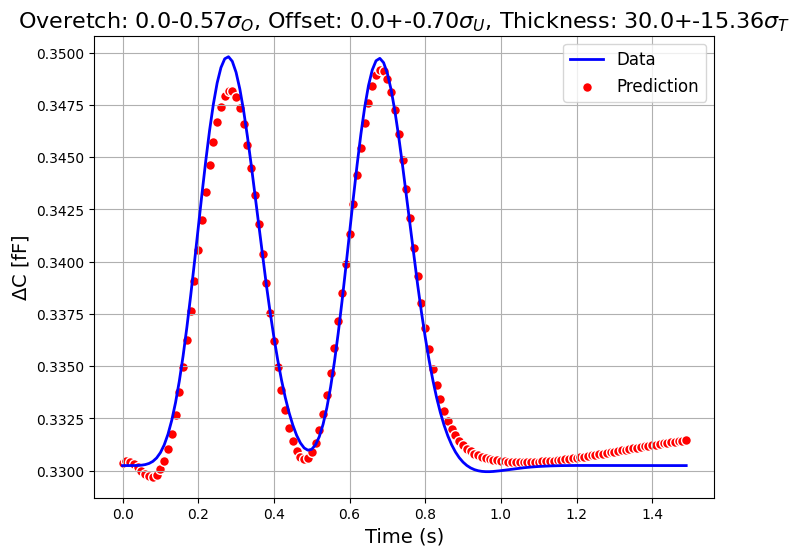

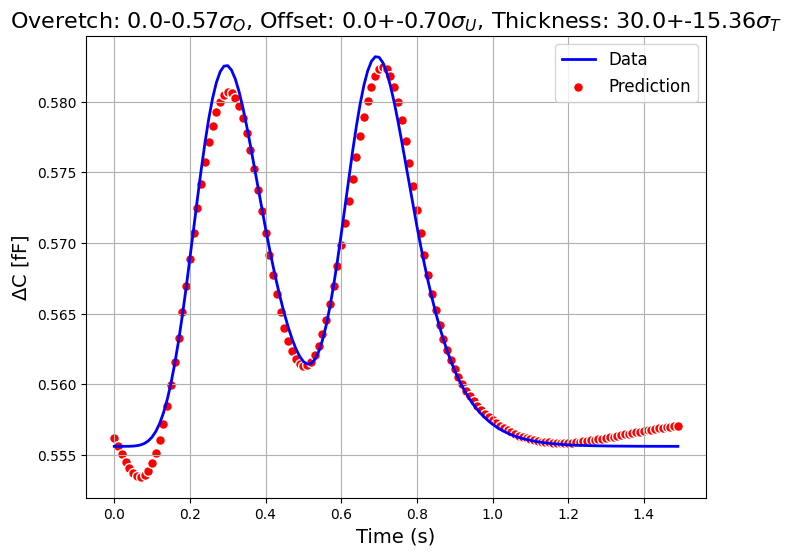

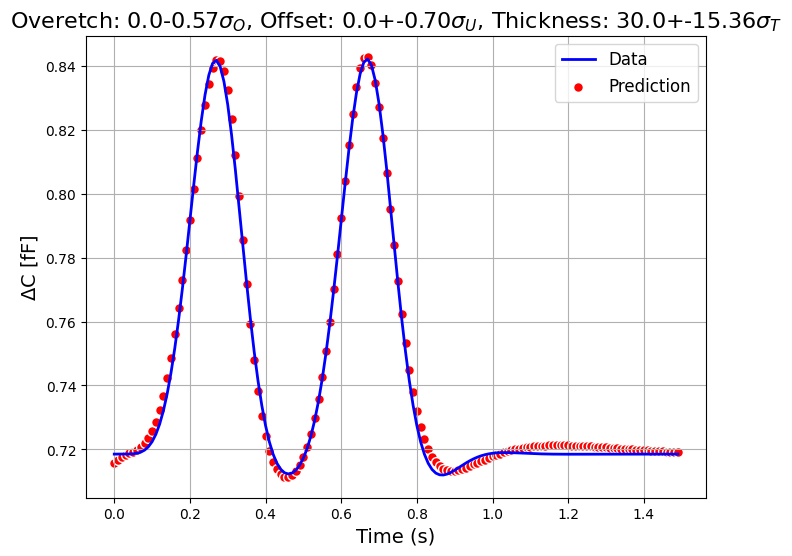

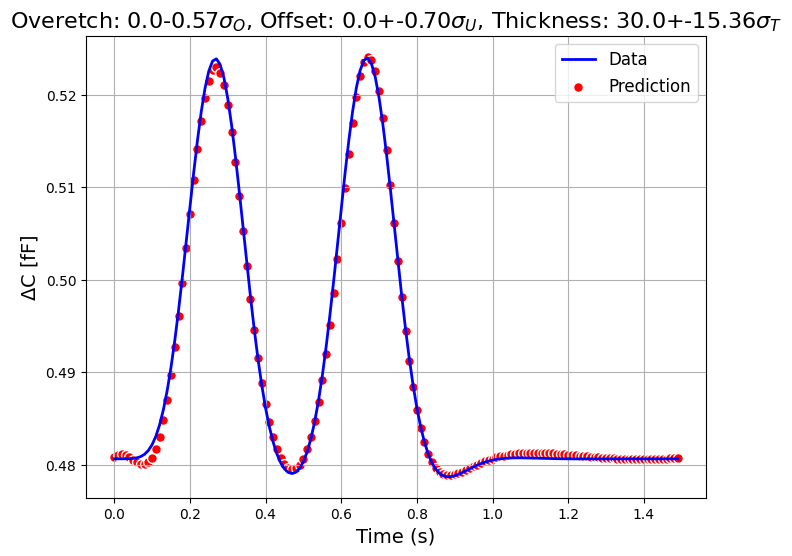

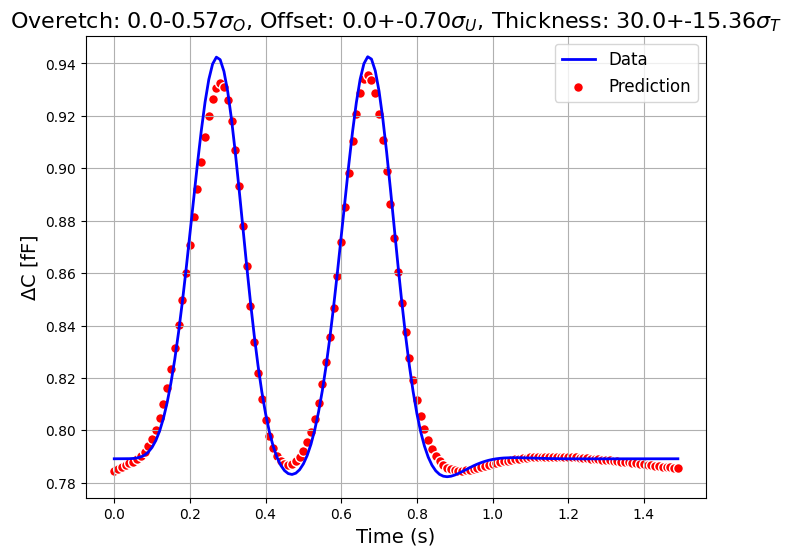

In [5]:
plot_predictions(model_I, y_test, X_test_vec, time, max_plots=5)


### Second Surrogate Model

We now repeat the training procedure, mivong to the second dataset involving the sensitivity w.r.t. geometric parameters 

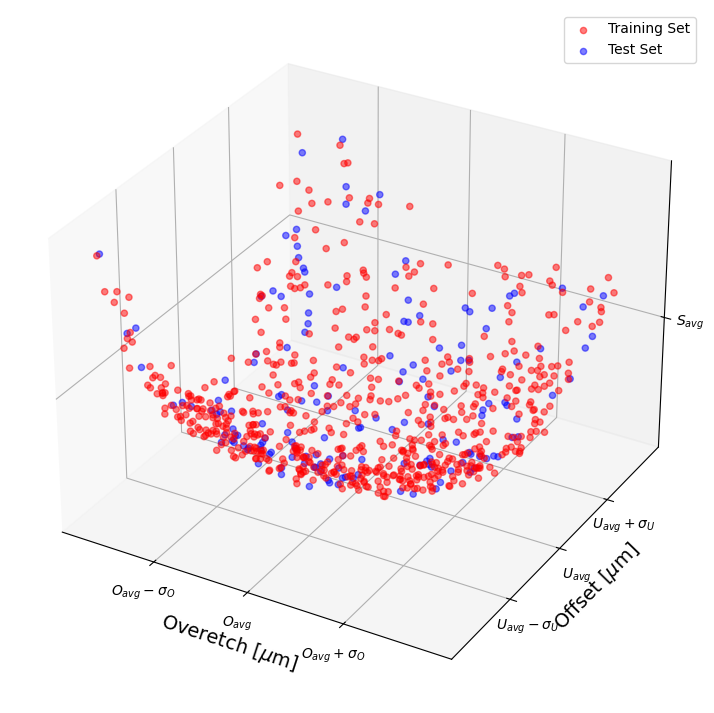

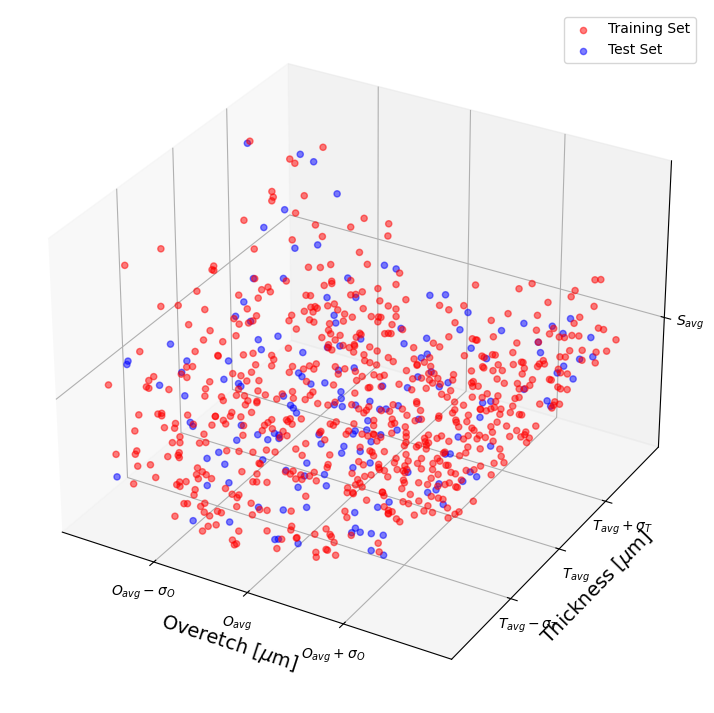

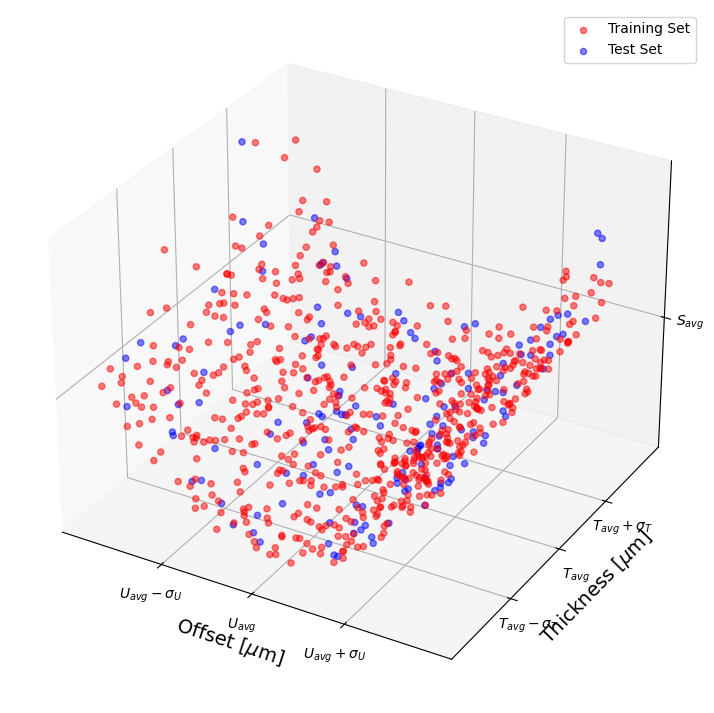

In [6]:
# CONFIGURATION FILE
CONFIGURATION_FILE = './config_II.json'

mean_overetch = 0.0
mean_offset = 0.0
mean_thickness = 0.0
mean_sensitivity = 1.0

sigma_O = 1.0
sigma_U = 1.0
sigma_T = 1.0 

# Preprocessing
data_processor = preprocessing(CONFIGURATION_FILE)

# Collecting traing and Testing Data
X_train = data_processor.X_train
X_test = data_processor.X_test
y_train = data_processor.y_train
y_test = data_processor.y_test

# Scaled and processed data
X_train_scaled = data_processor.X_train_vec
X_test_scaled = data_processor.X_test_vec 

labels = [
    r'Overetch [${\mu}$m]', 
    r'Offset [${\mu}$m]', 
    r'Thickness [${\mu}$m]',
    'S'
    ]

ticks = [
    [mean_overetch - sigma_O + 0.05, mean_overetch, mean_overetch + sigma_O - 0.05],
    [mean_offset - sigma_U + 0.05, mean_offset, mean_offset + sigma_U - 0.05],
    [mean_thickness - sigma_T + 0.1, mean_thickness, mean_thickness + sigma_T-0.1],
    [1.0]
]

ticks_labels = [
    [r'$O_{avg}-\sigma_O$', r'$O_{avg}$', r'$O_{avg}+\sigma_O$'],
    [r'$U_{avg}-\sigma_U$', r'$U_{avg}$', r'$U_{avg}+\sigma_U$'],
    [r'$T_{avg}-\sigma_T$', r'$T_{avg}$', r'$T_{avg}+\sigma_T$'],
    [r'$S_{avg}$']
]

plot_sensitivity_dataset(X_train, X_test, y_train, y_test, [0, 1, 3], mean_sensitivity,
                         labels, ticks, ticks_labels)

plot_sensitivity_dataset(X_train, X_test, y_train, y_test, [0, 2, 3], mean_sensitivity,
                         labels, ticks, ticks_labels)

plot_sensitivity_dataset(X_train, X_test, y_train, y_test, [1, 2, 3], mean_sensitivity,
                         labels, ticks, ticks_labels)


In [9]:
training = True

if training:
    train(CONFIGURATION_FILE)

model_II = NN_Model()
model_II.load_model(data_processor.config['MODEL_PATH'])

Num GPUs Available:  0
Epoch 1/1000


/Users/filippozacchei/anaconda3/envs/cuqipy/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 1s - 21ms/step - loss: 0.9289 - mse: 0.9289 - learning_rate: 0.0010
Epoch 2/1000
32/32 - 0s - 1ms/step - loss: 0.9239 - mse: 0.9239 - learning_rate: 9.9010e-04
Epoch 3/1000
32/32 - 0s - 1ms/step - loss: 0.8801 - mse: 0.8801 - learning_rate: 9.8039e-04
Epoch 4/1000
32/32 - 0s - 979us/step - loss: 0.8193 - mse: 0.8193 - learning_rate: 9.7087e-04
Epoch 5/1000
32/32 - 0s - 1ms/step - loss: 0.7083 - mse: 0.7083 - learning_rate: 9.6154e-04
Epoch 6/1000
32/32 - 0s - 1ms/step - loss: 0.5484 - mse: 0.5484 - learning_rate: 9.5238e-04
Epoch 7/1000
32/32 - 0s - 1ms/step - loss: 0.3987 - mse: 0.3987 - learning_rate: 9.4340e-04
Epoch 8/1000
32/32 - 0s - 1ms/step - loss: 0.3435 - mse: 0.3435 - learning_rate: 9.3458e-04
Epoch 9/1000
32/32 - 0s - 1ms/step - loss: 0.2742 - mse: 0.2742 - learning_rate: 9.2593e-04
Epoch 10/1000
32/32 - 0s - 5ms/step - loss: 0.2365 - mse: 0.2365 - val_loss: 0.2822 - val_mse: 0.2822 - learning_rate: 9.1743e-04
Epoch 11/1000
32/32 - 0s - 986us/step - loss: 0.2047 - m

#### Accuracy

We now test again the accuracy of the model among training and validation data

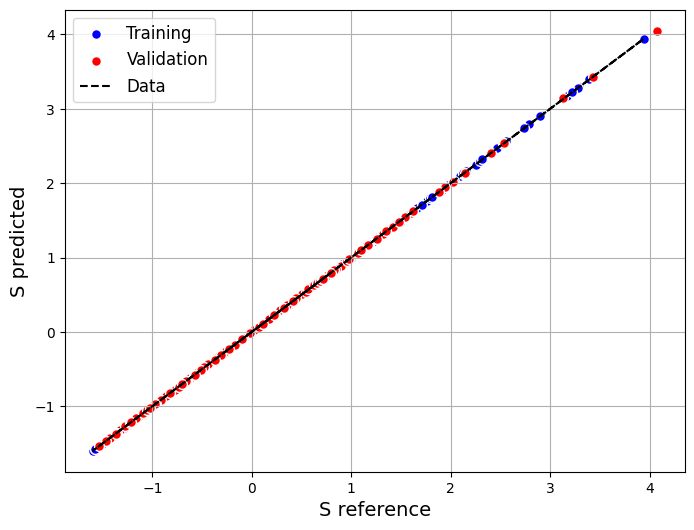

In [8]:
plot_correlation_sensitivity(model_II, X_train_scaled, X_test_scaled, y_train, y_test)